<a href="https://colab.research.google.com/github/yoonjong8739/NLP_study/blob/master/_10_%EA%B0%90%EC%A0%95_%EB%B6%84%EC%84%9D(Sentiment_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 감정 분석(Sentiment Analysis)

* 감정 분석은 텍스트에 등장하는 단어들을 통해 어떤 감정이 드러나는지 분석하는 기법
* 감정 분석은 오피니언 마이닝으로도 불리며, 텍스트에 담긴 의견, 태도 등을 알아보는데 유용한 기법
* 감정 분석을 하기 위해선 미리 정의된 감정 어휘 사전이 필요
* 감정 어휘 사전에 포함된 어휘가 텍스트에 얼마나 분포하는지에 따라 해당 텍스트의 감정이 좌우
* 토픽 모델링이 텍스트의 주제를 찾아낸다면, 감정 분석은 텍스트의 의견을 찾아냄
* 텍스트는 주제(토픽)와 의견(감정)의 결합으로 이루어졌다고 볼 수 있음

![2655364B5925AC9606[1].png](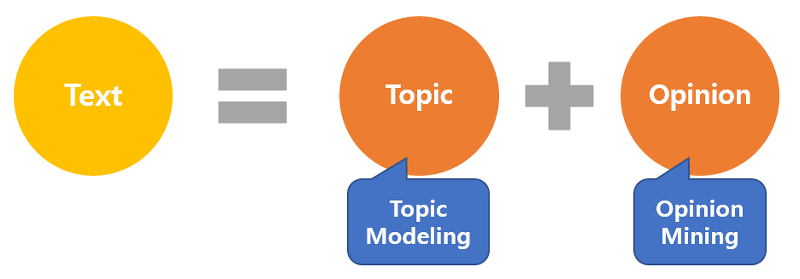)

* 감정 분석은 SNS, 리뷰 분석에 유용하게 사용할 수 있음
* 특정 이슈에 대한 사람들의 감정을 실시간으로 분석한다면, 그에 대해 신속하게 대처 가능

* 파이썬으로 감정 분석하는 방법은 크게 두 가지로 구분
  + 감정 어휘 사전을 이용한 감정 상태 분류
    -  미리 분류해둔 감정어 사전을 통해 분석하고자 하는 텍스트의 단어들을 사전에 기반해 분류하고, 그 감정가를 계산
    - 이 때 사용되는 감정어 사전에는 해당 감정에 해당되는 단어를 미리 정의해둬야 함
  + 기계학습을 이용한 감정 상태 분류
    - 분석 데이터의 일부를 훈련 데이터로 사용해 그로부터 텍스트의 감정 상태를 분류
    - 이 때 사용되는 훈련 데이터는 사용자가 분류한 감정 라벨이 포함되어 있어야 하며,  
이를 인공 신경망, 의사 결정 트리 등의 기계 학습 알고리즘을 사용하여 분류

## 감정 어휘 사전을 이용한 감정 상태 분류

### 감정 사전 준비

*   감정 사전 라이브러리를 설치
*   afinn은 영어에 대한 긍정, 부정에 대한 감정 사전을 제공


In [ ]:
!pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53428 sha256=768e2d0e0f0017f64fab6164ec720745d6971e7eef598d17e376007c60d159f8
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


### 데이터 준비

1.   사용할 데이터를 구성
2.   데이터는 사이킷런에 내장되어 있는 뉴스그룹 데이터를 이용

In [ ]:
from sklearn.datasets import fetch_20newsgroups

newsdata = fetch_20newsgroups(subset='train')
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

### 감정 상태 분류 및 시각화

*   감정 사전을 구성하고 감정 스코어를 측정
*   afinn 라이브러리는 감정 사전과 더불어 편리하게 감정가를 계산할 수 있는 함수를 제공

In [ ]:
from afinn import Afinn

afinn = Afinn()
for i in range(10):
    print(afinn.score(newsdata.data[i]))

7.0
11.0
16.0
5.0
-23.0
-25.0
7.0
3.0
16.0
-20.0


*   모든 뉴스에 대한 감정을 시각화
*   긍정과 부정에 대한 갯수를 시각화



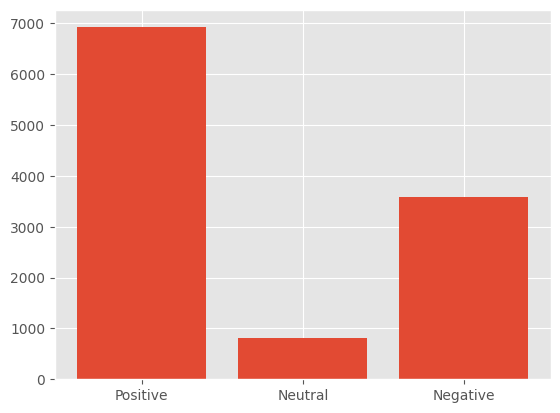

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

pos = 0
neu = 0
neg = 0

for i in newsdata.data:
    score = afinn.score(i)
    if score > 0:
        pos += 1
    elif score == 0:
        neu += 1
    else:
        neg += 1

plt.bar(np.arange(3), [pos, neu, neg])
plt.xticks(np.arange(3), ['Positive', 'Neutral', 'Negative'])
plt.show();

## 기계학습을 이용한 감정 분석

#### 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!set -x \
&& pip install konlpy

+ pip install konlpy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 33.9 MB/s eta 0:00:00


In [ ]:
import re
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from konlpy.tag import Okt
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

### 네이버 영화 리뷰 데이터

* 참고: https://wikidocs.net/44249

#### 데이터 로드

* 데이터를 웹에서 바로 받아오기 위해 `urllib.request` 사용
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
* 받아온 데이터를 `dataframe`으로 변환하고 데이터를 확인



In [ ]:
train_file = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt")
test_file = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt")

train_data = pd.read_table(train_file)
test_data = pd.read_table(test_file)

train_data.head(10)

id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
5   5403919      막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.      0
6   7797314                              원작의 긴장감을 제대로 살려내지못했다.      0
7   9443947  별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...      0
8   7156791                             액션이 없는데도 재미 있는 몇안되는 영화      1
9   5912145      왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?      1

#### 중복 및 결측치 처리

*   데이터 개수 확인
*   데이터에 중복이 존재한다면 이를 제거



In [ ]:
print(train_data['document'].nunique())
print(train_data['label'].nunique())

train_data.drop_duplicates(subset=['document'], inplace=True)

146182
2


In [ ]:
print(train_data.isna().sum())

train_data = train_data.dropna(how='any')

id          0
document    1
label       0
dtype: int64


#### 데이터 정제



*   데이터에서 한글과 공백을 제외하고 모두 제거



In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
train_data.head()

<ipython-input-10-e0147b590e8b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")


id                                           document  label
0   9976970                                  아 더빙 진짜 짜증나네요 목소리      0
1   3819312                         흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                          교도소 이야기구먼 솔직히 재미는 없다평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...      1

In [ ]:
train_data['document'].replace('', np.nan, inplace=True)
print(len(train_data))
print(train_data.isna().sum())

146182
id            0
document    391
label         0
dtype: int64


In [ ]:
train_data = train_data.dropna(how='any')
print(len(train_data))

145791


In [ ]:
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')

<ipython-input-13-55245d1ef2d9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")


#### 토큰화 및 불용어 제거



* 단어들을 분리하고 불용어를 제거함
* 불용어 사전: `'의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'`



In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
okt = Okt()

X_train = []
for sentence in train_data['document']:
    X_train.append([ word for word in okt.morphs(sentence) if not word in stopwords ])

In [ ]:
print(X_train[:2])

[['아', '더빙', '진짜', '짜증나네요', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍지', '않구나']]


In [ ]:
X_test = []
for sentence in test_data['document']:
    X_test.append([ word for word in okt.morphs(sentence) if not word in stopwords ])

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)  # 단어 인덱스 사전 구축
print(tokenizer.word_index)  # 단어 인덱스 확인

{'영화': 1, '을': 2, '너무': 3, '다': 4, '정말': 5, '적': 6, '만': 7, '진짜': 8, '로': 9, '점': 10, '에서': 11, '연기': 12, '것': 13, '평점': 14, '내': 15, '최고': 16, '그': 17, '나': 18, '안': 19, '인': 20, '이런': 21, '스토리': 22, '생각': 23, '못': 24, '왜': 25, '드라마': 26, '게': 27, '이다': 28, '감동': 29, '사람': 30, '보고': 31, '하는': 32, '하고': 33, '말': 34, '고': 35, '더': 36, '배우': 37, '때': 38, 'ㅋㅋ': 39, '아': 40, '감독': 41, '거': 42, '그냥': 43, '본': 44, '요': 45, '재미': 46, '시간': 47, '내용': 48, '까지': 49, '뭐': 50, '중': 51, '보다': 52, '없는': 53, '쓰레기': 54, '수': 55, '네': 56, '지': 57, '봤는데': 58, '작품': 59, '사랑': 60, '할': 61, '하나': 62, '다시': 63, '없다': 64, '볼': 65, '마지막': 66, '좋은': 67, '이건': 68, '정도': 69, '저': 70, '같은': 71, '완전': 72, '입니다': 73, '있는': 74, 'ㅋ': 75, 'ㅠㅠ': 76, '처음': 77, 'ㅋㅋㅋ': 78, '장면': 79, '액션': 80, '주인공': 81, '걸': 82, '이렇게': 83, '보는': 84, '개': 85, '하': 86, '최악': 87, '돈': 88, '이야기': 89, '지금': 90, '봐도': 91, '느낌': 92, '참': 93, '임': 94, '연출': 95, 'ㅡㅡ': 96, '라': 97, '인데': 98, '없고': 99, '듯': 100, '끝': 101, '명작': 102, '그리고': 103, '년':

#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [ ]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value  # 전체 단어 빈도 수

    if value < threshold:
        rare_cnt += 1  # 희귀 단어 빈도 수
        rare_freq = rare_freq + value

print("전체 단어 수 : {}".format(words_cnt))
print("빈도가 {} 이하인 희귀 단어 수 : {}".format(threshold-1, rare_cnt))
print("희귀 단어 비율 : {}".format( (rare_cnt / words_cnt) * 100 ))
print("희귀 단어 등장 빈도 비율 : {}".format( (rare_freq / words_freq)*100 ))

전체 단어 수 : 100004
빈도가 2 이하인 희귀 단어 수 : 67691
희귀 단어 비율 : 67.68829246830127
희귀 단어 등장 빈도 비율 : 4.949305773454659


In [ ]:
vocab_size = words_cnt - rare_cnt + 2  # +2 : 0번째 padding, out of vocabulary token
print(vocab_size)  # Embedding layer의 input_dim에 사용

32315


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [ ]:
drop_train = [ index for index, sentence in enumerate(X_train) if len(sentence) < 1 ]

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print(len(X_train))
print(len(y_train))

145383
145383


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


#### 패딩



*   리뷰의 전반적인 길이를 확인
*   모델의 입력을 위해 동일한 길이로 맞춰줌



In [ ]:
print("리뷰 최대 길이 : {}".format( max( len(l) for l in X_train )))
print("리뷰 평균 길이 : {}".format( sum(map(len, X_train)) / len(X_train) ))

리뷰 최대 길이 : 72
리뷰 평균 길이 : 11.22376068728806


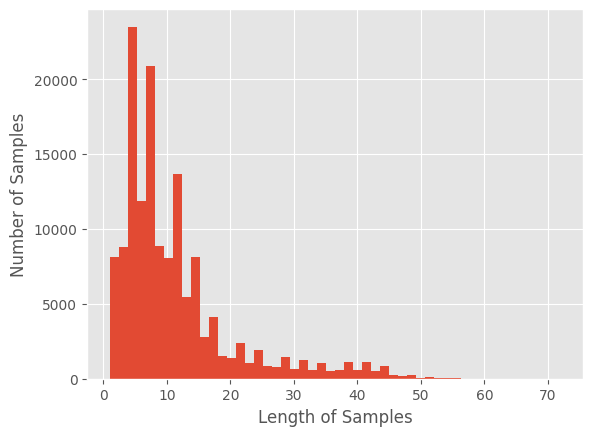

In [ ]:
plt.hist([ len(s) for s in X_train ], bins=50)

plt.xlabel('Length of Samples')
plt.ylabel("Number of Samples")
plt.show();

In [ ]:
max_len = 60

In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#### 모델 구축 및 학습

*   감정 상태 분류 모델을 선언하고 학습
*   모델은 일반적인 LSTM 모델을 사용



In [ ]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         3231500   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 3,348,877
Trainable params: 3,348,877
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    X_train, y_train, epochs=15,
    batch_size=60, validation_split=0.2
)

Epoch 1/15
1939/1939 [==============================] - 426s 218ms/step - loss: 0.4202 - acc: 0.8027 - val_loss: 0.3683 - val_acc: 0.8379
Epoch 2/15
1939/1939 [==============================] - 484s 250ms/step - loss: 0.3383 - acc: 0.8539 - val_loss: 0.3516 - val_acc: 0.8451
Epoch 3/15
1939/1939 [==============================] - 367s 190ms/step - loss: 0.3062 - acc: 0.8710 - val_loss: 0.3399 - val_acc: 0.8512
Epoch 4/15
1939/1939 [==============================] - 370s 191ms/step - loss: 0.2774 - acc: 0.8865 - val_loss: 0.3377 - val_acc: 0.8528
Epoch 5/15
1939/1939 [==============================] - 369s 190ms/step - loss: 0.2515 - acc: 0.9005 - val_loss: 0.3379 - val_acc: 0.8555
Epoch 6/15
1939/1939 [==============================] - 369s 190ms/step - loss: 0.2277 - acc: 0.9115 - val_loss: 0.3462 - val_acc: 0.8538
Epoch 7/15
1939/1939 [==============================] - 367s 189ms/step - loss: 0.2068 - acc: 0.9209 - val_loss: 0.3646 - val_acc: 0.8529
Epoch 8/15
1939/1939 [============

In [ ]:
model.evaluate(X_test, y_test)

1532/1532 [==============================] - 57s 37ms/step - loss: 0.6010 - acc: 0.8278


[0.6010106801986694, 0.8277783393859863]

#### 시각화

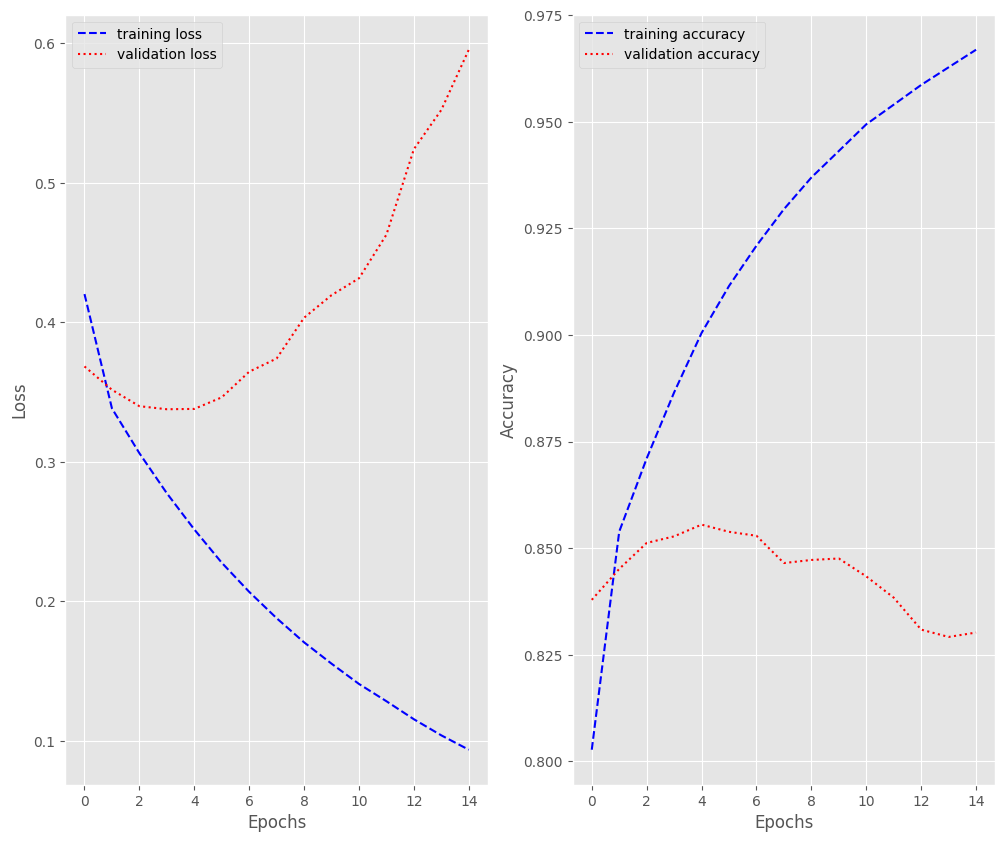

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
plt.plot(loss, 'b--', label="training loss")
plt.plot(val_loss, 'r:', label="validation loss")
plt.legend()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(acc, 'b--', label="training accuracy")
plt.plot(val_acc, 'r:', label="validation accuracy")
plt.legend()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show();

#### 감정 예측

In [ ]:
def sentiment_predict(new_sentence):
    new_token = [ word for word in okt.morphs(new_sentence) if not word in stopwords ]
    new_sequences = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_sequences, maxlen=max_len)
    score = float(model.predict(new_pad))

    if score > 0.5:
        print("{} -> 긍정({:.3f}%)".format(new_sentence, score*100))
    else:
        print("{} -> 부정({:.3f}%)".format(new_sentence, (1-score)*100))

In [ ]:
sentiment_predict('정말 재미있고 흥미진진 했어요.')  # 긍정
sentiment_predict('존나 재미없네 보지 마세요.')  # 부정
sentiment_predict('배우 연기력이 대박입니다..')  # 긍정
sentiment_predict('정말 지루하고 내용 이해하기가 어렵습니다..')  # 부정

1/1 [==============================] - 0s 25ms/step
정말 재미있고 흥미진진 했어요. -> 긍정(99.244%)
1/1 [==============================] - 0s 26ms/step
존나 재미없네 보지 마세요. -> 부정(99.478%)
1/1 [==============================] - 0s 24ms/step
배우 연기력이 대박입니다.. -> 긍정(96.229%)
1/1 [==============================] - 0s 27ms/step
정말 지루하고 내용 이해하기가 어렵습니다.. -> 부정(99.685%)


### 네이버 쇼핑 리뷰 데이터

* 참고: https://wikidocs.net/94600

### 데이터 로드
- https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

#### 데이터 로드

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import urllib.request
from collections import Counter
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt",
                           filename="shopping.txt")

('shopping.txt', <http.client.HTTPMessage at 0x7f9bf70bb880>)

In [ ]:
total_data = pd.read_table("shopping.txt", names=['ratings', 'reviews'])
print(len(total_data))

200000


In [ ]:
total_data.head(10)

ratings                                            reviews
0        5                                            배공빠르고 굿
1        2                      택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2        5  아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3        2  선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4        5                  민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5        2  비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6        1  주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7        2                          넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8        2                          보폴이 계속 때처럼 나오다가 지금은 안나네요~
9        2  110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...

#### 훈련 데이터와 테스트 데이터 분리

In [ ]:
total_data['label'] = np.select([total_data['ratings'] > 3], [1], default=0)
total_data.head(10)

ratings                                            reviews  label
0        5                                            배공빠르고 굿      1
1        2                      택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고      0
2        5  아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...      1
3        2  선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...      0
4        5                  민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ      1
5        2  비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...      0
6        1  주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...      0
7        2                          넉넉한 길이로 주문했는데도 안 맞네요 별로예요      0
8        2                          보폴이 계속 때처럼 나오다가 지금은 안나네요~      0
9        2  110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...      0

In [ ]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 2)

In [ ]:
total_data.drop_duplicates(subset=['reviews'], inplace=True )
print(len(total_data))

199908


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(
    total_data, test_size=0.25, random_state=111
)

print(len(train_data))
print(len(test_data))

149931
49977


#### 레이블의 분포 확인

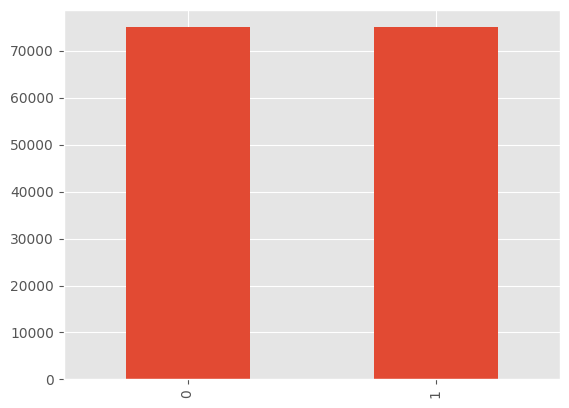

In [ ]:
train_data['label'].value_counts().plot(kind='bar');

In [ ]:
train_data.groupby('label').size().reset_index(name='count')

label  count
0      0  74974
1      1  74957

#### 데이터 정제

In [ ]:
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
train_data['reviews'].replace("", np.nan, inplace=True)
train_data = train_data.dropna(how='any')

print(len(train_data))

<ipython-input-29-a3761bea3a0b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")


149931


In [ ]:
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
test_data['reviews'].replace("", np.nan, inplace=True)
test_data = test_data.dropna(how='any')

print(len(test_data))

<ipython-input-30-6afde016d8df>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")


49977


#### 토큰화 및 불용어 제거

* 불용어 사전: `'도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게'`

In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
okt = Okt()

train_data['reviews'] = train_data['reviews'].apply(okt.morphs)
train_data['reviews'] = train_data['reviews'].apply(lambda x : [ item for item in x if item not in stopwords ])

In [ ]:
test_data['reviews'] = test_data['reviews'].apply(okt.morphs)
test_data['reviews'] = test_data['reviews'].apply(lambda x : [ item for item in x if item not in stopwords ])

In [ ]:
X_train = train_data['reviews'].values
y_train = train_data['label'].values
X_test = test_data['reviews'].values
y_test = test_data['label'].values

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(149931,)
(149931,)
(49977,)
(49977,)


#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value  # 전체 단어 빈도 수

    if value < threshold:
        rare_cnt += 1  # 희귀 단어 빈도 수
        rare_freq = rare_freq + value

print("전체 단어 수 : {}".format(words_cnt))
print("빈도가 {} 이하인 희귀 단어 수 : {}".format(threshold-1, rare_cnt))
print("희귀 단어 비율 : {}".format( (rare_cnt / words_cnt) * 100 ))
print("희귀 단어 등장 빈도 비율 : {}".format( (rare_freq / words_freq)*100 ))

전체 단어 수 : 94536
빈도가 2 이하인 희귀 단어 수 : 64509
희귀 단어 비율 : 68.23749682660574
희귀 단어 등장 빈도 비율 : 4.099506889461724


In [ ]:
vocab_size = words_cnt - rare_cnt + 2
print(vocab_size)

30029


In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:2])

[[7417, 3240, 14808, 83], [2571, 947, 48, 7, 6122, 238, 273, 349, 274, 622, 1689, 2506, 1, 1218, 329, 227, 3559, 1004, 2962, 11840, 96, 7418, 1804, 48, 608, 17, 26, 14809, 33]]


In [ ]:
print(X_test[:2])

[[4, 732, 14, 305, 145, 217, 7131, 1129], [1, 717, 757, 9, 53, 65, 17, 1376]]


#### 패딩

In [ ]:
print("리뷰 최대 길이 : {}".format( max( len(l) for l in X_train )))
print("리뷰 평균 길이 : {}".format( sum(map(len, X_train)) / len(X_train) ))

리뷰 최대 길이 : 61
리뷰 평균 길이 : 12.453241824572636


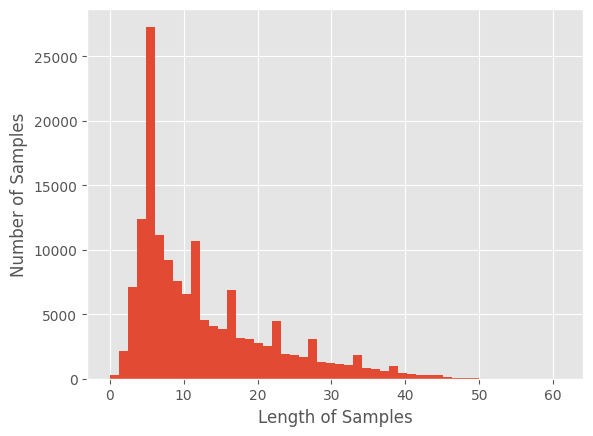

In [ ]:
plt.hist([ len(s) for s in X_train ], bins=50)

plt.xlabel('Length of Samples')
plt.ylabel("Number of Samples")
plt.show();

In [ ]:
max_len = 50

In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#### 모델 구축 및 학습

In [ ]:
from keras.layers import Embedding, Dense, GRU
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         3002900   
                                                                 
 gru_1 (GRU)                 (None, 128)               88320     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,091,349
Trainable params: 3,091,349
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=4, restore_best_weights=True)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'],
)

history = model.fit(
    X_train, y_train, epochs=15, batch_size=60, validation_split=0.2, callbacks=[es, mc]
)

Epoch 1/15
2000/2000 [==============================] - ETA: 0s - loss: 0.2952 - acc: 0.8839
Epoch 1: val_acc improved from -inf to 0.90246, saving model to best_model.h5
2000/2000 [==============================] - 308s 151ms/step - loss: 0.2952 - acc: 0.8839 - val_loss: 0.2627 - val_acc: 0.9025
Epoch 2/15
1999/2000 [============================>.] - ETA: 0s - loss: 0.2314 - acc: 0.9166
Epoch 2: val_acc improved from 0.90246 to 0.90786, saving model to best_model.h5
2000/2000 [==============================] - 241s 121ms/step - loss: 0.2314 - acc: 0.9166 - val_loss: 0.2493 - val_acc: 0.9079
Epoch 3/15
2000/2000 [==============================] - ETA: 0s - loss: 0.2074 - acc: 0.9263
Epoch 3: val_acc improved from 0.90786 to 0.91083, saving model to best_model.h5
2000/2000 [==============================] - 240s 120ms/step - loss: 0.2074 - acc: 0.9263 - val_loss: 0.2440 - val_acc: 0.9108
Epoch 4/15
1999/2000 [============================>.] - ETA: 0s - loss: 0.1894 - acc: 0.9348
Epoch 4

In [ ]:
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(X_test, y_test)

1562/1562 [==============================] - 24s 14ms/step - loss: 0.2470 - acc: 0.9139


[0.24701546132564545, 0.9139003753662109]

#### 시각화

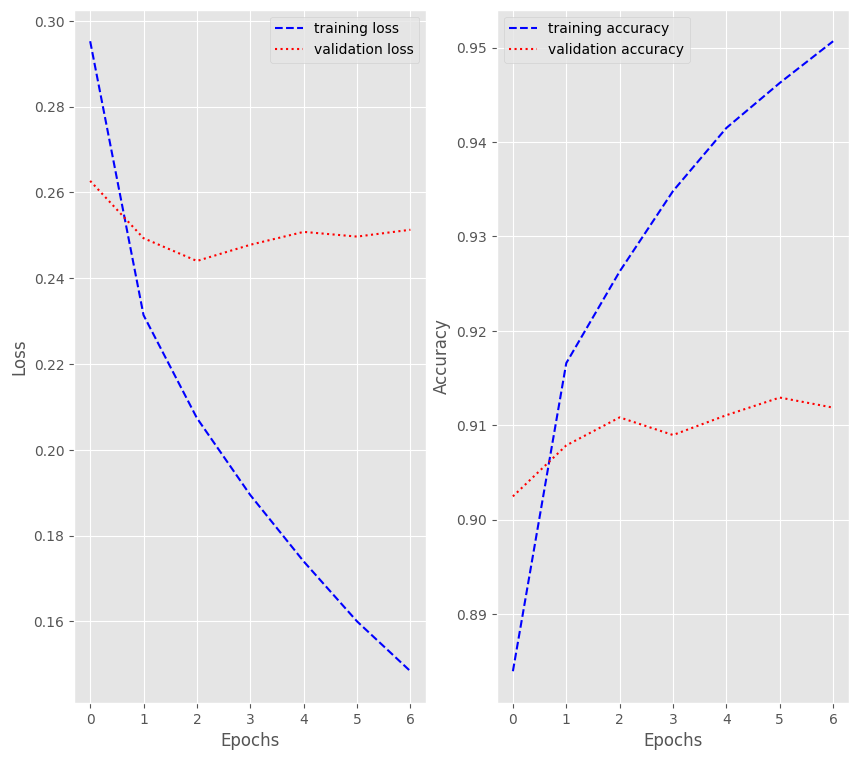

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
plt.plot(loss, 'b--', label="training loss")
plt.plot(val_loss, 'r:', label="validation loss")
plt.legend()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(acc, 'b--', label="training accuracy")
plt.plot(val_acc, 'r:', label="validation accuracy")
plt.legend()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show();

#### 감정 예측

In [ ]:
def sentiment_predict(new_sentence):
    new_token = [ word for word in okt.morphs(new_sentence) if not word in stopwords ]
    new_sequences = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_sequences, maxlen=max_len)
    score = float(loaded_model.predict(new_pad))

    if score > 0.5:
        print("{} -> 긍정({:.3f}%)".format(new_sentence, score*100))
    else:
        print("{} -> 부정({:.3f}%)".format(new_sentence, (1-score)*100))

In [ ]:
sentiment_predict('처음 써봤는데 대박 좋아요.')  # 긍정
sentiment_predict('원래 배송이 이렇게 늦나요? 개판이네 다시는 안 쓴다.')  # 부정
sentiment_predict('만족도 최상!!! 정말 강추합니다.')  # 긍정
sentiment_predict('딱히... 전 별로였어요. 케바케인듯.')  # 부정

1/1 [==============================] - 1s 620ms/step
처음 써봤는데 대박 좋아요. -> 긍정(98.551%)
1/1 [==============================] - 0s 36ms/step
원래 배송이 이렇게 늦나요? 개판이네 다시는 안 쓴다. -> 부정(99.341%)
1/1 [==============================] - 0s 87ms/step
만족도 최상!!! 정말 강추합니다. -> 긍정(98.581%)
1/1 [==============================] - 0s 38ms/step
딱히... 전 별로였어요. 케바케인듯. -> 부정(99.692%)
